<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/KVec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import astropy
from google.colab import files



#First Feedback Notes from Prof. Terebey: 

Here is the task: 
1. Make a graph of velocity (in km/s) versus distance from a star (in astronomical units), 
of the Keplerian velocity that objects(planets) would have if they were in circular orbits around a star. 

2. Plot two curves on the same graph; one curve for objects orbiting a 1 solar mass star, 
and the second curve for objects that are orbiting a 0.2 solar mass star. 


In [0]:
from scipy import constants

#This function follows wiki's entry to calculate Keplerian Velocity 
#of an object performing a circular orbit around a celestial body. 

def Keplerian_Velocity(mass_factor, radius):
  
  M_sun = 1.98847542e+30 #kg
  one_au =1.496e+8 #(km)
  
  standard_gravitational_parameter = scipy.constants.G * mass_factor * M_sun
  
  #to adjust for units to make sure [km]/s
  convertion_rate = 1e9
  
  #radius from AUs to km 
  
  radius = one_au * radius
  
  #return value for the keplerian velocity
  return np.sqrt((1/convertion_rate)*np.divide(standard_gravitational_parameter,radius))

In [0]:
#Define the Range for Radius to apply to Keplerian_Velocity
radius_range = np.arange(0,1,0.01)

#calculate the orbits of the two cases: one full sun, and a fifth of a sun

full_sun = Keplerian_Velocity(1, radius_range)
not_so_full_sun = Keplerian_Velocity(0.2, radius_range)

# An extra plot line

mega_full_sun = Keplerian_Velocity(5, radius_range)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


#Plot Showing Keplerian Velocity from Classical Mechanics

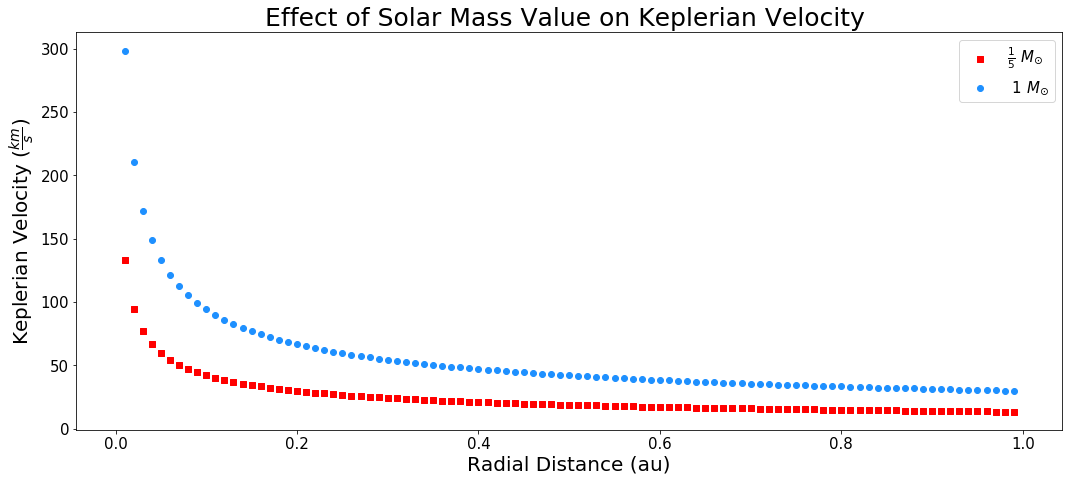

In [0]:
plt.figure(figsize=(15,7))

plt.scatter(radius_range,not_so_full_sun, color='red', marker='s', label = r'$\frac{1}{5}$ $M_{\odot}$')
plt.scatter(radius_range,full_sun,color='dodgerblue',marker='o', label=' 1 $M_{\odot}$')
#plt.plot(radius_range,mega_full_sun, color='limegreen', linestyle='-', label = ' 5 $M_{\odot}$')

plt.ylabel(r'Keplerian Velocity $(\frac{km}{s})$', fontsize=20)
plt.xlabel(r'Radial Distance (au)', fontsize=20)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.title('Effect of Solar Mass Value on Keplerian Velocity ', fontsize=25)

plt.tight_layout()
plt.subplots_adjust(top=.9)

plt.savefig('Orbit_Plot.pdf')

#files.download('Orbit_Plot.pdf')

In [0]:
print('Speed of Earth at 1 AU: ', np.round(full_sun[-1]), 'km/s')

Speed of Earth at 1 AU:  30.0 km/s


#First Half of Feedback Notes from Prof. Terebey

1) I looked at what you sent. It does seem like something is missing. There is no documentation of how you came up with the conversion factor. The description that you gave (adjust to make the answer right) is not the way to do it. 

For the first task, I suggest that you review the equation. Tell me the [units] of everything that you plugged into the equation, and the [units] of the velocity that comes out of the equation. 

The unit conversion comes later, *after* the velocity is calculated. 
**bold text**

#Dimensional Analysis of Equation of Motion for Keplerian Velocity

We start from the following equation of orbital mechanics:

${\displaystyle v_{o}\approx {\sqrt {\frac {GM_{\odot}}{r}}}}$

For $M_{\odot}$, the units are $\approx 10^{30}$ k.

For $G$, the units are $\approx \frac{m^3}{10^{11} kg \cdot s^2}$

For the function above to calculate the Keplerian of an object, the input for $r$ is given in terms of a.u. Thus, the function will yield a result in a order of magnitute of: 

$\displaystyle  v_{o}\approx  \sqrt{\frac{10^{19} m^3}{s^2 \cdot a.u.}}$

In order to yield $v_o$ in $\frac{km}{s}$, both $m^3$ and a.u. must be converted into km by using the following relations:

1. $10^9$ m$^3$ = 1 k$m^3$.
2. 1 a.u. $\approx 10^8$km.

Taking this values into the original result we can yield the following dimensions:

$ v_{o}\approx \sqrt{\frac{km^2}{s^2}}$

which yields a keplerian velocity in the following order of magnitude with its appropiate dimensions:

 $v_{o}\approx \frac{km}{s}$

Using this dimensional analysis, we found the conversation factor of $10^9 m^3$ as well as the convertion from a.u to km to yield the results above.  

#Second Half of Feedback Notes:

2) I ask that you plot the points (symbols) on the graph rather than plotting a line. 

3) I ask that you also make a second plot with logarithmic axes. Log (v) version log(R), where log means log base 10 and not natural log (ln). 

4) Let me know when you are done (important), and reply with answers to all the points. 

#Applying Logarithm Scaling to Keplerian Velocity and Radius

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


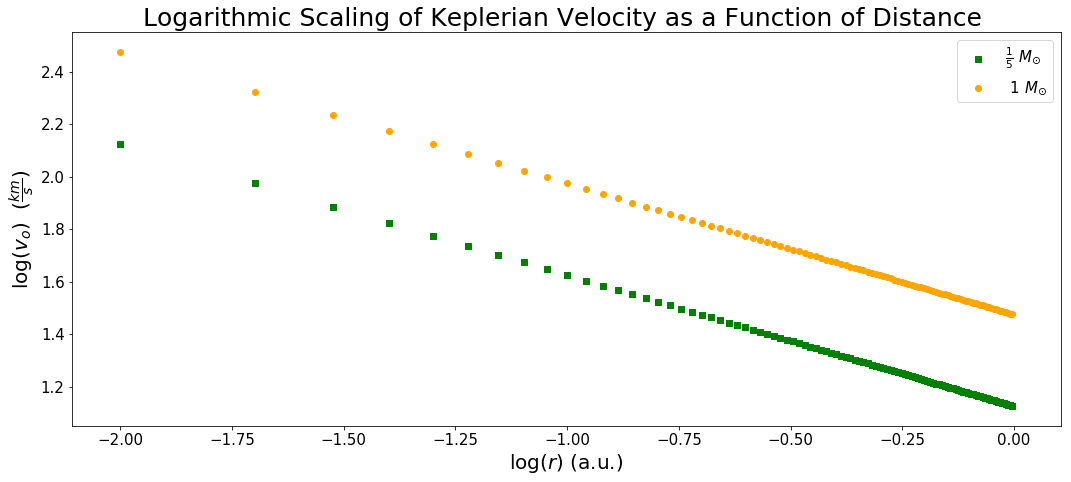

In [0]:
#This code is going to take the previously calculated values for radius and keplerian velocity

log_radius_range = np.log10(radius_range)
log_full_sun = np.log10(full_sun)
log_not_so_full_sun = np.log10(not_so_full_sun)

plt.figure(figsize=(15,7))

plt.scatter(log_radius_range,log_not_so_full_sun, color='green', marker='s', label = r'$\frac{1}{5}$ $M_{\odot}$')
plt.scatter(log_radius_range,log_full_sun,color='orange',marker='o', label=' 1 $M_{\odot}$')
#plt.plot(radius_range,mega_full_sun, color='limegreen', linestyle='-', label = ' 5 $M_{\odot}$')

plt.ylabel(r'$\log (v_{o})$  $(\frac{km}{s})$', fontsize=20)
plt.xlabel(r'$\log(r)$ (a.u.)', fontsize=20)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.title('Logarithmic Scaling of Keplerian Velocity as a Function of Distance ', fontsize=25)

plt.tight_layout()
plt.subplots_adjust(top=.9)

plt.savefig('Orbit_Plot.pdf')